## This notebook is used to estimate/predict energy consumption using a pre-trained RouteE model

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nrel.routee.powertrain as pt
pd.set_option('display.max_columns', None)

In [2]:
## Newly trained model using updated RouteE powertrain
new_m = pt.load_model('RouteE_Test_Vehicle.json')


In [3]:
## Read in the sample trip for RouteE energy prediction
df_sample_trip = pd.read_csv('NRT_trip_sample.csv')

In [4]:
df_sample_trip.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,travel_time,travel_dist,speed
0,268180,11:32:00,2024-05-20 11:32:00,3011,1,DUNN ST. - MAIN & FERRY,0,0,0.00,1,1,0.00,30.113053
1,268180,11:33:35,2024-05-20 11:33:35,3401,2,DUNN ST. - MAIN & FERRY,0,0,794.65,0,95,794.65,30.113053
2,268180,11:35:00,2024-05-20 11:35:00,3565,3,DUNN ST. - MAIN & FERRY,0,0,1441.44,1,85,646.79,27.393459
3,268180,11:38:54,2024-05-20 11:38:54,3254,4,DUNN ST. - MAIN & FERRY,0,0,2763.55,0,234,1322.11,20.340154
4,268180,11:40:00,2024-05-20 11:40:00,3654,5,DUNN ST. - MAIN & FERRY,0,0,3134.01,1,66,370.46,20.206909


In [5]:
### Prepare the RouteE input

df_sample_trip['miles'] = df_sample_trip['travel_dist']/1000/1.60934
df_sample_trip['gpsspeed'] = df_sample_trip['speed']/1.60934

In [6]:
### No elevation data for now, use 0 road grade

df_sample_trip['grade'] = 0

In [7]:
### RouteE prediction

df_sample_trip['predict_gallons'] = new_m.predict(df_sample_trip, feature_columns=["gpsspeed"])

df_sample_trip['predict_gallons_cumsum'] = df_sample_trip['predict_gallons'].cumsum()

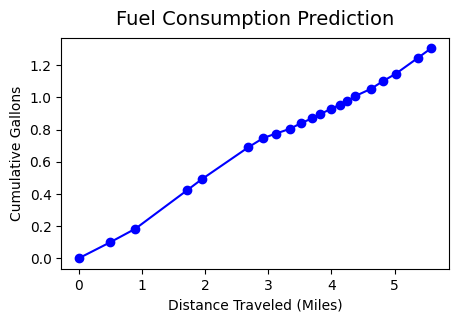

In [8]:
### Visualize cummulative energy consumption

fig, ax = plt.subplots(1, 1,figsize = [5,3])

plt.plot(df_sample_trip.shape_dist_traveled/1609.34, df_sample_trip['predict_gallons_cumsum'],color = 'blue',marker = 'o')
plt.xlabel('Distance Traveled (Miles)')
plt.ylabel('Cumulative Gallons')


ax.set_title('Fuel Consumption Prediction',fontsize = 14,y=1.02)
fig.savefig('./Figures/Fuel_Consumption_Prediction_Sample.png',dpi = 300,bbox_inches = "tight")